
## São Paulo - SP 01/07/2019
### Previsão de preços de automoveis 
Caso de estudo onde uso **machine learn** para analisar um dataset e prever os preços dos veiculos.
### jeferson@asterixsolucoes.com.br
#### Dataset obtido via portal Microsoft Azure Machine Learn
###### (https://github.com/jjanuario/previsao_preco_carro/blob/master/automobile_price_data_raw_.csv)


In [1]:
# Realizando os imports
import pandas as pd

1. Obtendo os dados

In [74]:
# Lendo o dataset
file = 'automobile_price_data_raw_.csv'
df = pd.read_csv(file)

In [75]:
# Visualizando os dados
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


1.1 Preparando os dados.

Alguns dados são irrelevantes para meu caso de estudo por isso irrei deletar a coluna 'normalized-losses'


In [80]:
# Removendo a coluna normalized-losses
df = df.drop('normalized-losses', axis=1)

In [81]:
# 1.1.1 Localizando dados inconcistentes
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

1.2 Aparentemente não temos dados faltantes, mas caso tivessemos ireiamos deletar as linhas relacionadas.
**Talvez não seja a melhor forma de resolver.** Mas mesmo assim adotarei essa solução.

In [82]:
# Apagando todas as linhas com dados faltantes
df.dropna(inplace=True)

1.3 **Definindo os recursos** necessarios para meu caso de estudo as colunas **city-mpg** e **highway-mpg** fazem relação ao consumo de combustivel do veiculo por isso ficarei apenas com umas das colunas. Agora selecionarei apenas algunas colunas para criação do meu modelo.

In [90]:
# Visualizando a cabeça do dataset colunas make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
df[['make','body-style','wheel-base','engine-size','horsepower','peak-rpm','highway-mpg','price']].head()

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
0,alfa-romero,convertible,88.6,130,111,5000,27,13495
1,alfa-romero,convertible,88.6,130,111,5000,27,16500
2,alfa-romero,hatchback,94.5,152,154,5000,26,16500
3,audi,sedan,99.8,109,102,5500,30,13950
4,audi,sedan,99.4,136,115,5500,22,17450


2. Agora com os dados prontos iremos treinar nosso modelo
Neste caso de estudo para prever o numero preço/valor do carro utilizarei **regressão linear**, caso fosse a previsão de qual cor de carro seria mais vendida utilizaria classificação. 
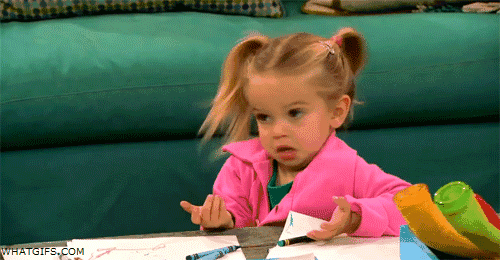